In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Please manually download bank-additional-full.csv from below link and copy it to the directory of your jupyter notebook:
# https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

# Reading the input file "bank-additional-full"
input_data=pd.read_csv('bank-additional-full.csv')

In [3]:
# Having a quick look to the top 5 row of dataset
input_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Checking the type of features 
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Converting "contact", "month", "day_of_week", "y" from categorical to numerical using lable encoding
input_data['contact'] = input_data['contact'].map({'telephone':0, 'cellular':1})
input_data['month'] = input_data['month'].map({'mar':0, 'apr':1,'may':2,'jun':3,'jul':4,'aug':5,'sep':6,'oct':7,'nov':8,'dec':9})
input_data['day_of_week'] = input_data['day_of_week'].map({'mon':0, 'tue':1, 'wed':2,'thu':3,'fri':4})
input_data['y'] = input_data['y'].map({'no':0, 'yes':1})

In [6]:
# converting the rest of categorical attributes (such as jub and marital for which order has no meaning) to dummy variables
input_data = pd.get_dummies(data=input_data, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan'])

In [7]:
# Double Checking the type of features to make sure only the target variable (poutcome) is categorical 
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   contact                        41188 non-null  int64  
 2   month                          41188 non-null  int64  
 3   day_of_week                    41188 non-null  int64  
 4   duration                       41188 non-null  int64  
 5   campaign                       41188 non-null  int64  
 6   pdays                          41188 non-null  int64  
 7   previous                       41188 non-null  int64  
 8   poutcome                       41188 non-null  object 
 9   emp.var.rate                   41188 non-null  float64
 10  cons.price.idx                 41188 non-null  float64
 11  cons.conf.idx                  41188 non-null  float64
 12  euribor3m                      41188 non-null 

                                 Building Decision Tree Classifier (One-vs-One Approach)

In [8]:
# Removing "previous" and "pdays" as highly correlated with target and make AUC 100%. So for for reasonable classification, I removed them.
# Removing loan_unknown" as highly correlated with "housing unknown" according to task 1
input_data.drop("loan_unknown", axis=1, inplace = True)
input_data.drop("previous", axis=1, inplace = True)
input_data.drop("pdays", axis=1, inplace = True)

In [9]:
#Creating 3 datasets for our 3 binray classifiers (1-success-vs-failure | 2-success-vs-nonexistend | 3-nonexistent-vs-failure)
Input_Data_SuccessVsFailure = pd.DataFrame()
Input_Data_SuccessVsNoneexist = pd.DataFrame()
Input_Data_FailureVsNoneexist = pd.DataFrame()
Input_Data_SuccessVsFailure = Input_Data_SuccessVsFailure.append(input_data[input_data["poutcome"] != "nonexistent"])
Input_Data_SuccessVsNoneexist = Input_Data_SuccessVsNoneexist.append(input_data[input_data["poutcome"] != "failure"])
Input_Data_FailureVsNoneexist = Input_Data_FailureVsNoneexist.append(input_data[input_data["poutcome"] != "success"])

                       Building binary classifier L1 in order to predict Success versus Failure

In [10]:
# Building binary classifier L1 in order to predict Success vs Failure

# removing "poutcome", as a target variable, from data and move it to variable "label"
from sklearn.metrics import confusion_matrix,accuracy_score
training_set_L1 = Input_Data_SuccessVsFailure.drop('poutcome',axis=1)
label_L1 = Input_Data_SuccessVsFailure.poutcome

# Splitting the data to training and test data, 67% and 33% respectively 
X_train_L1, X_test_L1, y_train_L1, y_test_L1 = train_test_split(training_set_L1, label_L1, test_size = 0.33, random_state = 20)

# Initilaizing required variable 
dtree_1v1_model_L1 = [0]*20
dtree_1v1_accuracy_train_L1 = [0]*20
dtree_1v1_accuracy_test_L1 = [0]*20
dtree_1v1_pred_train_L1 = [0]*20
dtree_1v1_pred_test_L1 = [0]*20

# Creating decision trees with different depths (from 2 to 20) and see their accuracy on training and test set
for i in range(2,20):
    dtree_1v1_L1 = DecisionTreeClassifier(random_state=30 , max_depth=i)
    dtree_1v1_model_L1[i] = dtree_1v1_L1.fit(X_train_L1, y_train_L1)
    dtree_1v1_pred_train_L1[i] = dtree_1v1_model_L1[i].predict(X_train_L1)
    dtree_1v1_pred_test_L1[i] = dtree_1v1_model_L1[i].predict(X_test_L1)
    dtree_1v1_accuracy_train_L1[i] = accuracy_score(y_train_L1, dtree_1v1_pred_train_L1[i])
    dtree_1v1_accuracy_test_L1[i] = accuracy_score(y_test_L1, dtree_1v1_pred_test_L1[i])
    
# Sorting the decision trees with different depth based on the Accuracy on test set
models = pd.DataFrame({
                    'Decision Tree Depth (One-vs-Rest)': ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'],
                    'Test Accuracy': dtree_1v1_accuracy_test_L1[2:20],
                    'Training Accuracy' : dtree_1v1_accuracy_train_L1[2:20]
})

models.sort_values(by='Test Accuracy', ascending=False)

,Decision Tree Depth (One-vs-Rest),Test Accuracy,Training Accuracy
3,5,0.826602,0.839703
2,4,0.825525,0.834926
1,3,0.824987,0.829087
0,2,0.824448,0.827760
4,6,0.817447,0.848726
6,8,0.810447,0.867304
5,7,0.809908,0.857749
7,9,0.801292,0.880573
8,10,0.796984,0.896497
9,11,0.792138,0.909236


In [11]:
# Checking the best depth for binary classifier L1 (Success vs Failure) in terms of Test Accuracy
best_acc_1v1_L1 = max(dtree_1v1_accuracy_test_L1)
best_depth_1v1_L1 = dtree_1v1_accuracy_test_L1.index(best_acc_1v1_L1)
pd.DataFrame({
                'Classifier': ['Decision Tree (Success VS Failure)'],
                'The Best Depth': best_depth_1v1_L1,
                'Test Accuracy': best_acc_1v1_L1,
                'Training Accuracy': dtree_1v1_accuracy_train_L1[best_depth_1v1_L1]
})

,Classifier,The Best Depth,Test Accuracy,Training Accuracy
0,Decision Tree (Success VS Failure),5,0.826602,0.839703


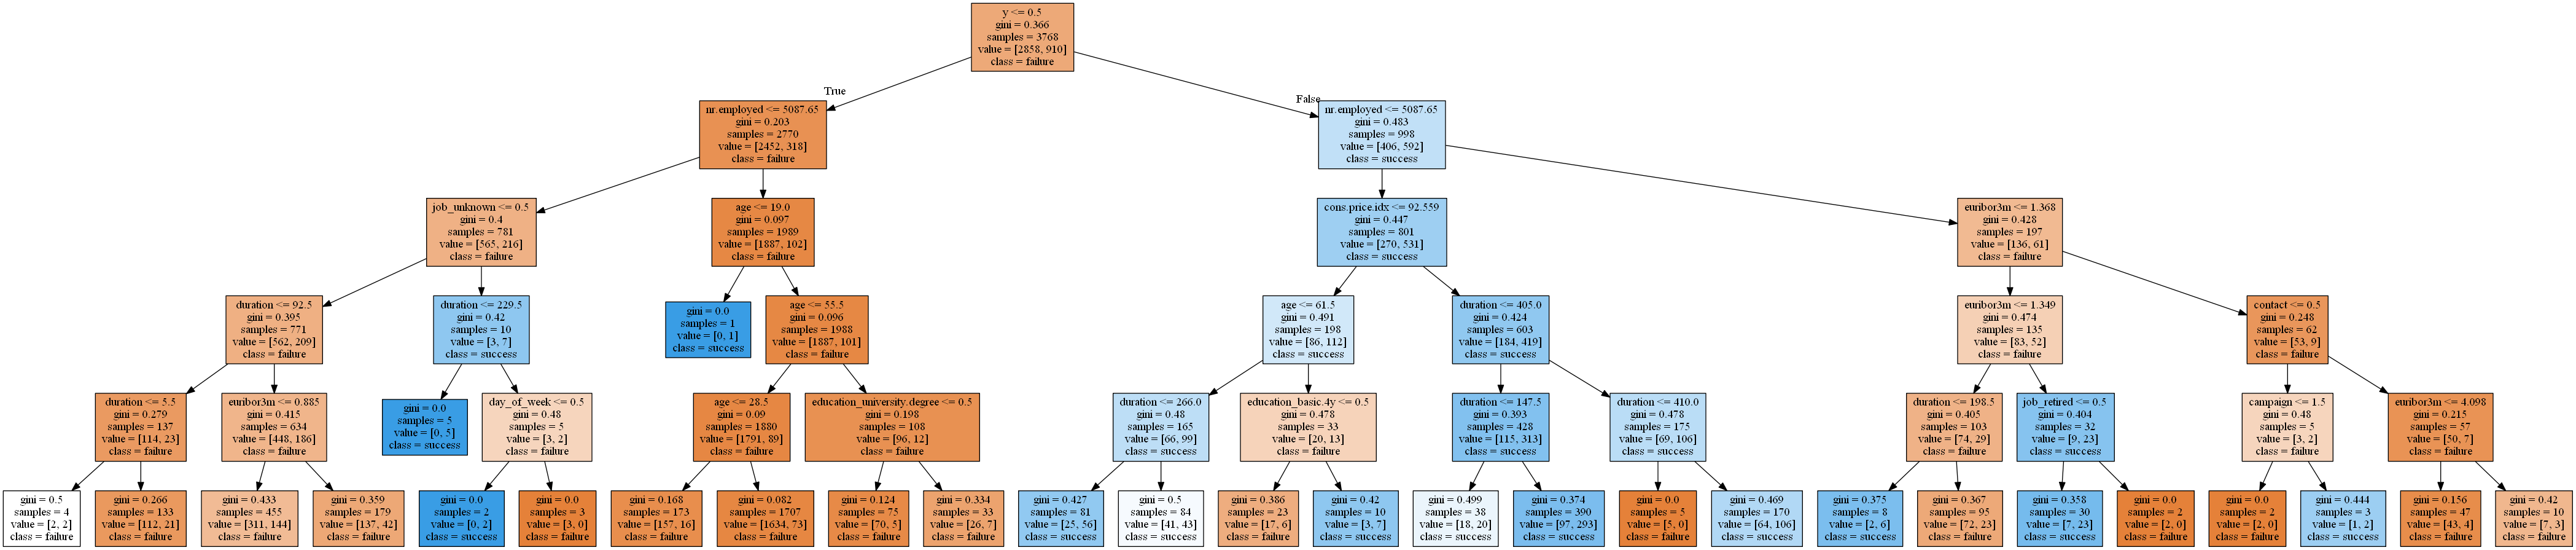

In [12]:
# Visualizing binary classifier L1 (Success vs Failure)
import pydotplus
from sklearn import tree
from IPython.display import Image 

ln = ['failure','success']

# Create DOT data
dot_data = tree.export_graphviz(dtree_1v1_model_L1[best_depth_1v1_L1], out_file=None, 
                                feature_names=training_set_L1.columns,  
                                class_names=ln,
                                filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

                   Building binary classifier L2 in order to predict Success versus Nonexistent

In [16]:
# Building binary classifier L2 in order to predict Success vs Nonexistent
training_set_L2 = Input_Data_SuccessVsNoneexist.drop('poutcome',axis=1)
label_L2 = Input_Data_SuccessVsNoneexist.poutcome

# Splitting the data to training and test data, 67% and 33% respectively 
X_train_L2, X_test_L2, y_train_L2, y_test_L2 = train_test_split(training_set_L2, label_L2, test_size = 0.33, random_state = 20)

# Initilaizing required variable 
dtree_1v1_model_L2 = [0]*20
dtree_1v1_accuracy_train_L2 = [0]*20
dtree_1v1_accuracy_test_L2 = [0]*20
dtree_1v1_pred_train_L2 = [0]*20
dtree_1v1_pred_test_L2 = [0]*20

# Creating decision trees with different depths (from 2 to 20) and see their accuracy on training and test set
for i in range(2,20):
    dtree_1v1_L2 = DecisionTreeClassifier(random_state=30 , max_depth=i)
    dtree_1v1_model_L2[i] = dtree_1v1_L2.fit(X_train_L2, y_train_L2)
    dtree_1v1_pred_train_L2[i] = dtree_1v1_model_L2[i].predict(X_train_L2)
    dtree_1v1_pred_test_L2[i] = dtree_1v1_model_L2[i].predict(X_test_L2)
    dtree_1v1_accuracy_train_L2[i] = accuracy_score(y_train_L2, dtree_1v1_pred_train_L2[i])
    dtree_1v1_accuracy_test_L2[i] = accuracy_score(y_test_L2, dtree_1v1_pred_test_L2[i])
    
# Sorting the decision trees with different depth based on the Accuracy on test set
models = pd.DataFrame({
                    'Decision Tree (Success VS Nonexistent)': ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'],
                    'Test Accuracy': dtree_1v1_accuracy_test_L2[2:20],
                    'Training Accuracy' : dtree_1v1_accuracy_train_L2[2:20]
})

models.sort_values(by='Test Accuracy', ascending=False)


,Decision Tree (Success VS Nonexistent),Test Accuracy,Training Accuracy
1,3,0.967512,0.965935
3,5,0.967512,0.967713
4,6,0.967348,0.968521
2,4,0.966937,0.966582
5,7,0.966281,0.970219
6,8,0.964886,0.972441
0,2,0.964394,0.962056
7,9,0.963492,0.975270
9,11,0.962589,0.982058
8,10,0.962097,0.978826


In [17]:
# Checking the best depth for binary classifier L2 (Success vs Nonexistent) in terms of Test Accuracy
best_acc_1v1_L2 = max(dtree_1v1_accuracy_test_L2)
best_depth_1v1_L2 = dtree_1v1_accuracy_test_L2.index(best_acc_1v1_L2)
pd.DataFrame({
                'Classifier': ['Decision Tree (Success VS Nonexistent)'],
                'The Best Depth': best_depth_1v1_L2,
                'Test Accuracy': best_acc_1v1_L2,
                'Training Accuracy': dtree_1v1_accuracy_train_L2[best_depth_1v1_L2]
})

,Classifier,The Best Depth,Test Accuracy,Training Accuracy
0,Decision Tree (Success VS Nonexistent),3,0.967512,0.965935


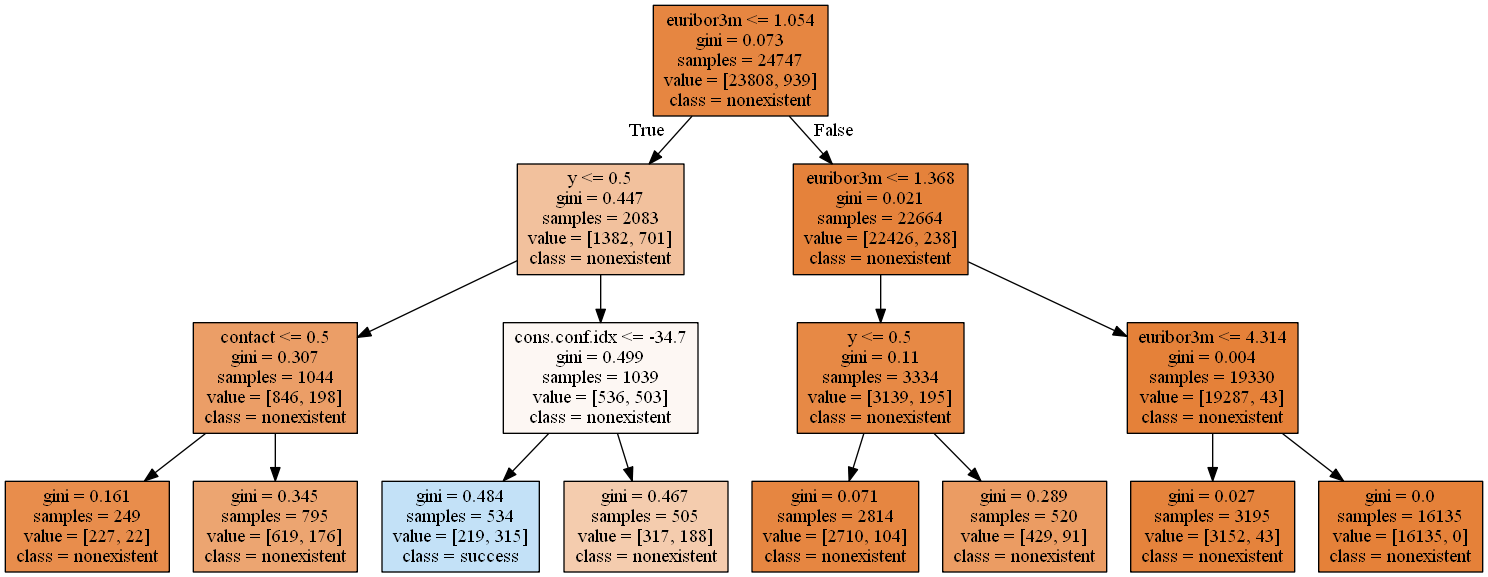

In [18]:
# Visualizing binary classifier L2 (Success vs Nonexistent)
import pydotplus
from sklearn import tree
from IPython.display import Image 

ln = ['nonexistent','success']

# Create DOT data
dot_data = tree.export_graphviz(dtree_1v1_model_L2[best_depth_1v1_L2], out_file=None, 
                                feature_names=training_set_L2.columns,  
                                class_names=ln,
                                filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

In [21]:
# Building binary classifier L3 in order to predict Failure vs Nonexistent
training_set_L3 = Input_Data_FailureVsNoneexist.drop('poutcome',axis=1)
label_L3 = Input_Data_FailureVsNoneexist.poutcome

# Splitting the data to training and test data, 67% and 33% respectively 
X_train_L3, X_test_L3, y_train_L3, y_test_L3 = train_test_split(training_set_L3, label_L3, test_size = 0.33, random_state = 20)

# Initilaizing required variable 
dtree_1v1_model_L3 = [0]*20
dtree_1v1_accuracy_train_L3 = [0]*20
dtree_1v1_accuracy_test_L3 = [0]*20
dtree_1v1_pred_train_L3 = [0]*20
dtree_1v1_pred_test_L3 = [0]*20

# Creating decision trees with different depths (from 2 to 20) and see their accuracy on training and test set
for i in range(2,20):
    dtree_1v1_L3 = DecisionTreeClassifier(random_state=30 , max_depth=i)
    dtree_1v1_model_L3[i] = dtree_1v1_L3.fit(X_train_L3, y_train_L3)
    dtree_1v1_pred_train_L3[i] = dtree_1v1_model_L3[i].predict(X_train_L3)
    dtree_1v1_pred_test_L3[i] = dtree_1v1_model_L3[i].predict(X_test_L3)
    dtree_1v1_accuracy_train_L3[i] = accuracy_score(y_train_L3, dtree_1v1_pred_train_L3[i])
    dtree_1v1_accuracy_test_L3[i] = accuracy_score(y_test_L3, dtree_1v1_pred_test_L3[i])
    
# Sorting the decision trees with different depth based on the Accuracy on test set
models = pd.DataFrame({
                    'Decision Tree (Failure VS Nonexistent)': ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'],
                    'Test Accuracy': dtree_1v1_accuracy_test_L3[2:20],
                    'Training Accuracy' : dtree_1v1_accuracy_train_L3[2:20]
})

models.sort_values(by='Test Accuracy', ascending=False)


,Decision Tree (Failure VS Nonexistent),Test Accuracy,Training Accuracy
4,6,0.896644,0.894287
0,2,0.895654,0.892000
1,3,0.895654,0.892000
2,4,0.895502,0.892038
3,5,0.895350,0.893912
5,7,0.894817,0.895412
6,8,0.892914,0.897473
7,9,0.892305,0.900772
8,10,0.891620,0.903546
9,11,0.886445,0.907707


In [23]:
# Checking the best depth for binary classifier L3 (Failure vs Nonexistent) in terms of Test Accuracy
best_acc_1v1_L3 = max(dtree_1v1_accuracy_test_L3)
best_depth_1v1_L3 = dtree_1v1_accuracy_test_L3.index(best_acc_1v1_L3)
pd.DataFrame({
                'Classifier': ['Decision Tree (Failure VS Nonexistent)'],
                'The Best Depth': best_depth_1v1_L3,
                'Test Accuracy': best_acc_1v1_L3,
                'Training Accuracy': dtree_1v1_accuracy_train_L3[best_depth_1v1_L3]
})

,Classifier,The Best Depth,Test Accuracy,Training Accuracy
0,Decision Tree (Failure VS Nonexistent),6,0.896644,0.894287


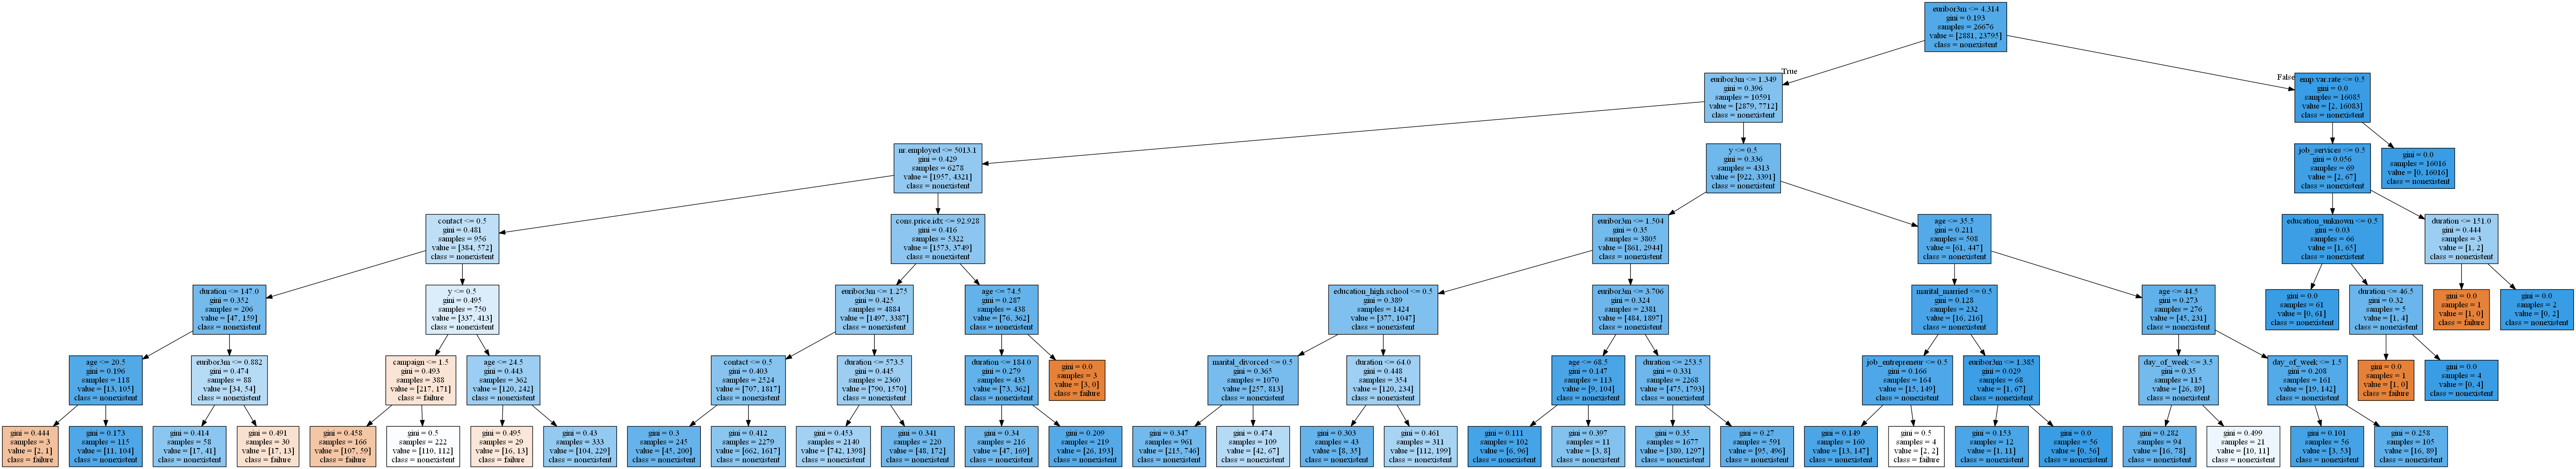

In [24]:
# Visualizing binary classifier L3 (Failure vs Nonexistent)
import pydotplus
from sklearn import tree
from IPython.display import Image 

ln = ['failure','nonexistent']

# Create DOT data
dot_data = tree.export_graphviz(dtree_1v1_model_L3[best_depth_1v1_L3], out_file=None, 
                                feature_names=training_set_L3.columns,  
                                class_names=ln,
                                filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

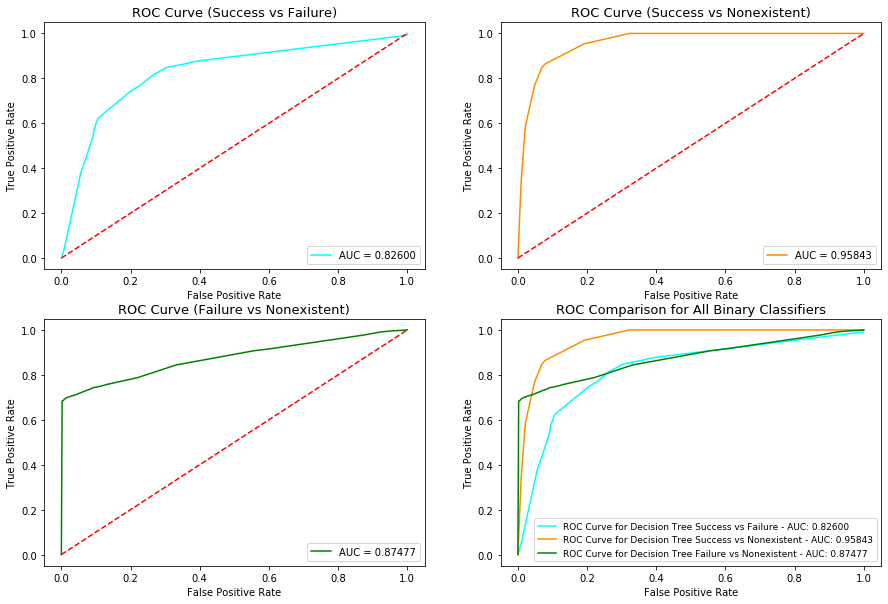

In [25]:
from sklearn import metrics
# Creating 4 subplots for plotting 2 ROC curves correspond to the 4 classifiers
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

# Calculating tpr, fpr and AUC for Decision Tree Classifier with the best depth (6)
dtree_prob_L1 = dtree_1v1_model_L1[best_depth_1v1_L1].predict_proba(X_test_L1)
dtree_preds_L1 = dtree_prob_L1[:,1]
fpr_dtree_L1, tpr_dtree_L1, _ = metrics.roc_curve(y_test_L1, dtree_preds_L1, pos_label='success')
auc_dtree_L1 = metrics.auc(fpr_dtree_L1, tpr_dtree_L1)


# Calculating tpr, fpr and AUC for Decision Tree Classifier with the best depth (6)
dtree_prob_L2 = dtree_1v1_model_L2[best_depth_1v1_L2].predict_proba(X_test_L2)
dtree_preds_L2 = dtree_prob_L2[:,1]
fpr_dtree_L2, tpr_dtree_L2, _ = metrics.roc_curve(y_test_L2, dtree_preds_L2, pos_label='success')
auc_dtree_L2 = metrics.auc(fpr_dtree_L2, tpr_dtree_L2)


# Calculating tpr, fpr and AUC for Decision Tree Classifier with the best depth (6)
dtree_prob_L3 = dtree_1v1_model_L3[best_depth_1v1_L3].predict_proba(X_test_L3)
dtree_preds_L3 = dtree_prob_L3[:,1]
fpr_dtree_L3, tpr_dtree_L3, _ = metrics.roc_curve(y_test_L3, dtree_preds_L3, pos_label='nonexistent')
auc_dtree_L3 = metrics.auc(fpr_dtree_L3, tpr_dtree_L3)


# Plotting ROC Curve (tpr versus fpr) for the L1
ax_arr[0,0].plot(fpr_dtree_L1, tpr_dtree_L1, label = 'AUC = %0.5f' % auc_dtree_L1, color='aqua')
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('ROC Curve (Success vs Failure)',fontsize=13)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 10})


ax_arr[0,1].plot(fpr_dtree_L2, tpr_dtree_L2, label = 'AUC = %0.5f' % auc_dtree_L2, color='darkorange')
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('ROC Curve (Success vs Nonexistent)',fontsize=13)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 10})


ax_arr[1,0].plot(fpr_dtree_L3, tpr_dtree_L3, label = 'AUC = %0.5f' % auc_dtree_L3, color='green')
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('ROC Curve (Failure vs Nonexistent)',fontsize=13)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 10})


# Comparing ROC Curve for all the 4 Classifiers in one figure
ax_arr[1,1].plot(fpr_dtree_L1, tpr_dtree_L1, 'b', label = 'ROC Curve for Decision Tree Success vs Failure - AUC: %0.5f' % auc_dtree_L1, color='aqua')
ax_arr[1,1].plot(fpr_dtree_L2, tpr_dtree_L2, 'b', label = 'ROC Curve for Decision Tree Success vs Nonexistent - AUC: %0.5f' % auc_dtree_L2, color='darkorange')
ax_arr[1,1].plot(fpr_dtree_L3, tpr_dtree_L3, 'b', label = 'ROC Curve for Decision Tree Failure vs Nonexistent - AUC: %0.5f' % auc_dtree_L3, color='green')
ax_arr[1,1].set_title('ROC Comparison for All Binary Classifiers',fontsize=13)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 9})

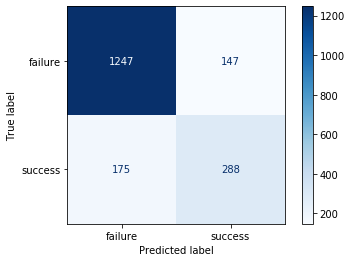

In [26]:
# Confusion Matrix for Classifier Success-vs-Failure
plot_confusion_matrix(dtree_1v1_model_L1[best_depth_1v1_L1], X_test_L1, y_test_L1,
                                 cmap=plt.cm.Blues,
                                 values_format='.0f',)

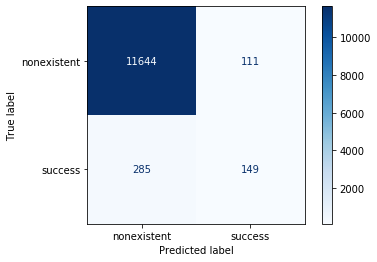

In [27]:
# Confusion Matrix for Classifier Success-vs-Nonexistent
plot_confusion_matrix(dtree_1v1_model_L2[best_depth_1v1_L2], X_test_L2, y_test_L2,
                                 cmap=plt.cm.Blues,
                                 values_format='.0f',)

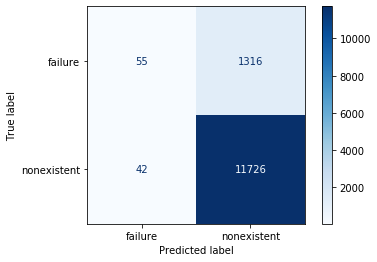

In [28]:
# Confusion Matrix for Classifier Failure-vs-Nonexistent
plot_confusion_matrix(dtree_1v1_model_L3[best_depth_1v1_L3], X_test_L3, y_test_L3,
                                 cmap=plt.cm.Blues,
                                 values_format='.0f',)

In [29]:
# Calculating the counts of Positive and Negatives for each binary class 
success_count_L1=0
failure_count_L1=0
success_count_L2=0
nonexistent_count_L2=0
failure_count_L3=0
nonexistent_count_L3=0

for i in range(len(y_test_L1)):
    if (y_test_L1.iloc[i]=="success"):
        success_count_L1+=1
    else:
        failure_count_L1+=1
            
for i in range(len(y_test_L2)):
    if (y_test_L2.iloc[i]=="success"):
        success_count_L2+=1
    else:
        nonexistent_count_L2+=1
            
for i in range(len(y_test_L3)):
    if(y_test_L3.iloc[i]=="nonexistent"):
        nonexistent_count_L3+=1
    else:
        failure_count_L3+=1 

In [30]:
# Calculating Macro and Prevelence Average of AUC for Classifier Success-vs-Failure
fpr_dtree_L1, tpr_dtree_L1, _ = metrics.roc_curve(y_test_L1, dtree_preds_L1, pos_label='success')
fnr_dtree_L1, tnr_dtree_L1, _ = metrics.roc_curve(y_test_L1, dtree_preds_L1, pos_label='failure')
auc_dtree_L1_1 = metrics.auc(fpr_dtree_L1, tpr_dtree_L1)
auc_dtree_L1_2 = metrics.auc(fnr_dtree_L1,tnr_dtree_L1)
Macro_auc_L1 = (auc_dtree_L1_1 + auc_dtree_L1_2)/2
Prevelene_auc_L1 = ((failure_count_L1/len(y_test_L1)) * auc_dtree_L1_1) + ((success_count_L1/len(y_test_L1))*auc_dtree_L1_2)


# Calculating Macro and Prevelence Average of AUC for Classifier Success-vs-Nonexistent
fpr_dtree_L2, tpr_dtree_L2, _ = metrics.roc_curve(y_test_L2, dtree_preds_L2, pos_label='success')
fnr_dtree_L2, tnr_dtree_L2, _ = metrics.roc_curve(y_test_L2, dtree_preds_L2, pos_label='nonexistent')
auc_dtree_L2_1 = metrics.auc(fpr_dtree_L2, tpr_dtree_L2)
auc_dtree_L2_2 = metrics.auc(fnr_dtree_L2, tnr_dtree_L2)
Macro_auc_L2 = (auc_dtree_L2_1 + auc_dtree_L2_2)/2
Prevelene_auc_L2 = ((nonexistent_count_L2/len(y_test_L2)) * auc_dtree_L2_1) + ((success_count_L2/len(y_test_L2))*auc_dtree_L2_2)


# Calculating Macro and Prevelence Average of AUC for Classifier Failure-vs-Nonexistent
fpr_dtree_L3, tpr_dtree_L3, _ = metrics.roc_curve(y_test_L3, dtree_preds_L3, pos_label='nonexistent')
fnr_dtree_L3, tnr_dtree_L3, _ = metrics.roc_curve(y_test_L3, dtree_preds_L3, pos_label='failure')
auc_dtree_L3_1 = metrics.auc(fpr_dtree_L3, tpr_dtree_L3)
auc_dtree_L3_2 = metrics.auc(fnr_dtree_L3,tnr_dtree_L3)
Macro_auc_L3 = (auc_dtree_L3_1 + auc_dtree_L3_2)/2
Prevelene_auc_L3 = ((nonexistent_count_L3/len(y_test_L3)) * auc_dtree_L3_1) + ((failure_count_L3/len(y_test_L3))*auc_dtree_L3_2)



In [31]:
# Sorting the Binary Classifiers based on Macro and Prevalence AUC
models = pd.DataFrame({
                    'Classifier': ['Success-vs-Failure', 'Success-vs-Nonexistent', 'Failure-vs-Nonexistent'],
                    'Macro AUC': [Macro_auc_L1,Macro_auc_L2,Macro_auc_L3],
                    'Weighted-prevelence AUC' : [Prevelene_auc_L1,Prevelene_auc_L2,Prevelene_auc_L3]
})

models.sort_values(by='Weighted-prevelence AUC', ascending=False)


,Classifier,Macro AUC,Weighted-prevelence AUC
1,Success-vs-Nonexistent,0.5,0.925783
2,Failure-vs-Nonexistent,0.5,0.796560
0,Success-vs-Failure,0.5,0.663438


In [32]:
# Importing libraries for decision tree classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

# removing "poutcome", as a target variable, from data and move it to variable "label"
training_set = input_data.drop('poutcome',axis=1)
label = input_data.poutcome

# Splitting the data to training and test data, 67% and 33% respectively 
X_train, X_test, y_train, y_test = train_test_split(training_set, label, test_size = 0.33, random_state = 20)

# Initilaizing required variable 
dtree_1v1_model = [0]*20
dtree_1v1_accuracy_train = [0]*20
dtree_1v1_accuracy_test = [0]*20
dtree_1v1_pred_train = [0]*20
dtree_1v1_pred_test = [0]*20

# Creating decision trees with different depths (from 2 to 20) and see their accuracy on training and test set
for i in range(2,20):
    dtree_1v1 = DecisionTreeClassifier(random_state=30 , max_depth=i)
    dtree_1v1_model[i] = dtree_1v1.fit(X_train, y_train)
    dtree_1v1_pred_train[i] = dtree_1v1_model[i].predict(X_train)
    dtree_1v1_pred_test[i] = dtree_1v1_model[i].predict(X_test)
    dtree_1v1_accuracy_train[i] = accuracy_score(y_train, dtree_1v1_pred_train[i])
    dtree_1v1_accuracy_test[i] = accuracy_score(y_test, dtree_1v1_pred_test[i])


# Checking the best depth for overal Multi-class classifier in terms of Test Accuracy
best_acc_1v1 = max(dtree_1v1_accuracy_test)
best_depth_1v1 = dtree_1v1_accuracy_test.index(best_acc_1v1)


# Calculating Macro and Prevalence_Weighted Average AUC for 1-vs-1 Classification
from sklearn.metrics import roc_auc_score
y_prob = dtree_1v1_model[best_depth_1v1].predict_proba(X_test)
AUC_Macro = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
AUC_Prevelence_Average = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")


models = pd.DataFrame({
                    'Classifier': '1-v-1 Total',
                    'Macro AUC': [AUC_Macro],
                    'Weighted-prevelence AUC' : [AUC_Prevelence_Average]
})

models.sort_values(by='Weighted-prevelence AUC', ascending=False)

,Classifier,Macro AUC,Weighted-prevelence AUC
0,1-v-1 Total,0.84925,0.893669
